#**PCA and KNN**
We implemented a KNN classifier using the Fashion-MNIST dataset and
PCA.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

## PCA

In [ ]:
def plot_cdf(data):
    sorted_data = np.sort(data)[::-1]

    data_cumsum = np.cumsum(sorted_data)
    data_normalized = data_cumsum / data_cumsum[-1]

    # Plot the CDF of eigenvalues
    plt.plot(np.arange(1, len(sorted_data)+1), data_normalized)
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Proportion of Variance')
    plt.title('Cumulative Distribution Function of Eigenvalues')
    plt.show()

In [ ]:
def fit_pca(X, n_components):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Choose the top k eigenvectors
    principal_components = eigenvectors[:, :n_components]

    return principal_components

In [ ]:
def pca_transform(X, principal_components):
    X_centered = X - np.mean(X, axis=0)
    transformed_data = np.dot(X_centered, principal_components)
    return transformed_data

In [ ]:
def pca_inverse_transform(X_transformed, principal_components, X):
    X_reconstructed = np.dot(X_transformed, principal_components.T)
    X_reconstructed += np.mean(X, axis=0)
    return X_reconstructed

## KNN Predict

In [ ]:
def knn_predict(X_train, y_train, X_test, k):
    # Compute pairwise distances between test samples and training samples
    distances = pairwise_distances(X_test, X_train, metric='euclidean')

    # Find the k nearest neighbors for each test sample
    nearest_indices = np.argpartition(distances, k, axis=1)[:, :k]
    nearest_labels = y_train[nearest_indices]

    # Count the occurrences of each label in the nearest neighbors
    label_counts = np.apply_along_axis(lambda x: np.bincount(x, minlength=np.max(y_train)+1), axis=1, arr=nearest_labels)
    y_pred = np.argmax(label_counts, axis=1)

    return y_pred

## Part 1: Load the dataset and display a random image

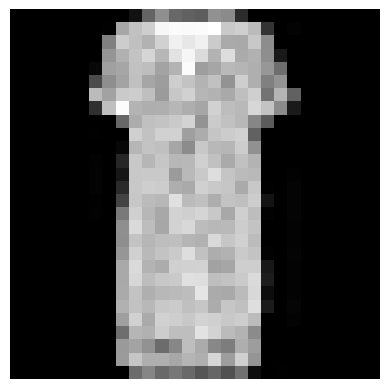

In [ ]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

random_index = np.random.randint(0, len(train_data))
random_image = train_data.iloc[random_index, 1:].values.reshape(28, 28)
plt.imshow(random_image, cmap='gray')
plt.axis('off')
plt.show()

X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

## Part 2: Use PCA to reduce the dimension of the images

In [ ]:
n_components = 81


Fit PCA on the training set:

In [ ]:
principal_components = fit_pca(X_train, n_components)

Apply PCA to both training and test sets:

In [ ]:
X_train_pca = pca_transform(X_train, principal_components)
X_test_pca = pca_transform(X_test, principal_components)

## Part 3: Apply PCA to a random image and recover the original size

In [ ]:
random_index = np.random.randint(0, len(X_train))
random_image = X_train[random_index].reshape(28, 28)

compressed_image = pca_transform(random_image.flatten(), principal_components)
recovered_image = pca_inverse_transform(compressed_image, principal_components, X_train).reshape(28, 28)

Plot the original, PCA-compressed, and recovered images:

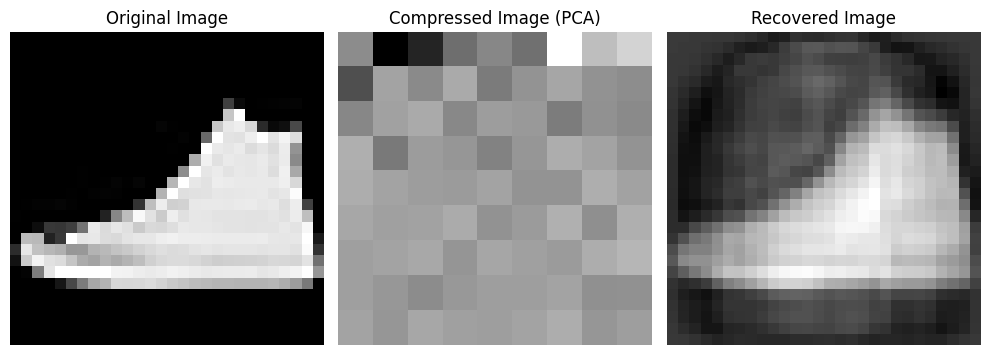

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(random_image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_image.reshape(9, 9), cmap='gray')
axs[1].set_title('Compressed Image (PCA)')
axs[1].axis('off')

axs[2].imshow(recovered_image, cmap='gray')
axs[2].set_title('Recovered Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

## Part 4: Plot the CDF

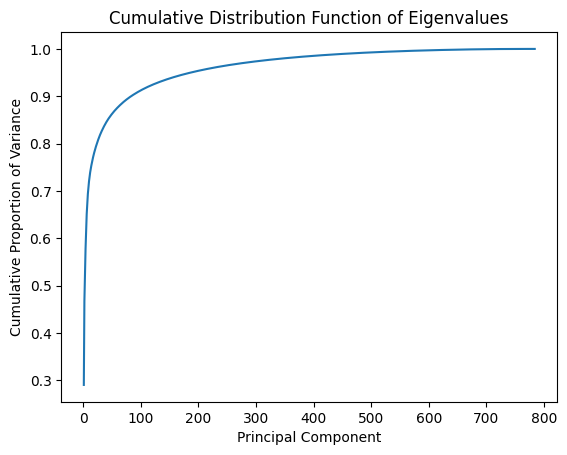

In [ ]:
eigenvalues = np.linalg.eigvalsh(np.cov(X_train.T))
plot_cdf(eigenvalues)

## Part 5: Train the model

In [ ]:
k = 9
y_pred = knn_predict(X_train_pca, y_train, X_test_pca, k)
accuracy = np.mean(y_pred == y_test)

## Part 6: Print the accuracy

In [ ]:
print(f"Test accuracy is: {accuracy * 100}%")

Test accuracy is: 86.6%
